# T3: Neural IBM1 (with collocation)

In [1]:
# first run a few imports:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
from pprint import pprint
import pickle
from utils import smart_reader, bitext_reader
from vocabulary import OrderedCounter, Vocabulary 
from utils import iterate_minibatches, prepare_data

# Load Data

In [2]:
# the paths to our training and validation data, English side
train_e_path = 'data/training/hansards.36.2.e.gz'
train_f_path = 'data/training/hansards.36.2.f.gz'
dev_e_path = 'data/validation/dev.e.gz'
dev_f_path = 'data/validation/dev.f.gz'
dev_wa = 'data/validation/dev.wa.nonullalign'
test_e_path = 'data/test/test.e.gz'
test_f_path = 'data/test/test.f.gz'
test_wa = 'data/test/test.wa.nonullalign'

In [3]:
# Using only 1000 words will result in many UNKs, but
# it will make training a lot faster. 
# If you have a fast computer, a GPU, or a lot of time,
# try with 10000 instead.
max_tokens=1000

corpus_e = smart_reader(train_e_path)    
vocabulary_e = Vocabulary(corpus=corpus_e, max_tokens=max_tokens)
pickle.dump(vocabulary_e, open("vocabulary_e.pkl", mode="wb"))

corpus_f = smart_reader(train_f_path)    
vocabulary_f = Vocabulary(corpus=corpus_f, max_tokens=max_tokens)
pickle.dump(vocabulary_f, open("vocabulary_f.pkl", mode="wb"))

# Model and Train

In [4]:
from neuralibm1 import NeuralIBM1Model
from neuralibm1trainer import NeuralIBM1Trainer

# Collocation

In [5]:
tf.reset_default_graph()

with tf.Session() as sess:

    # some hyper-parameters
    # tweak them as you wish
    batch_size=16  # on CPU, use something much smaller e.g. 1-16
    max_length=10
    lr = 0.001
    lr_decay = 0.0  # set to 0.0 when using Adam optimizer (default)
    emb_dim = 64
    mlp_dim = 128

    # our model
    # change context to : "gate", "concat", or "col_discrete". "col_discrete is for T3"
    model = NeuralIBM1Model(
        x_vocabulary=vocabulary_e, y_vocabulary=vocabulary_f, 
        batch_size=batch_size, emb_dim=emb_dim, mlp_dim=mlp_dim, session=sess, context="col_discrete")

    # our trainer
    trainer = NeuralIBM1Trainer(
        model, train_e_path, train_f_path, 
        dev_e_path, dev_f_path, dev_wa,
        test_e_path, test_f_path, test_wa,
        num_epochs=10, batch_size=batch_size, 
        max_length=max_length, lr=lr, lr_decay=lr_decay, session=sess)

    # now first TF needs to initialize all the variables
    print("Initializing variables..")
    sess.run(tf.global_variables_initializer())

    # now we can start training!
    print("Training started..")
    results = trainer.train()
    dev_AERs, test_AERs, train_likelihoods, dev_likelihoods = results

Training with B=16 max_length=10 lr=0.001 lr_decay=0.0
Initializing variables..
Training started..
Shuffling training data
Iter   100 loss 15.577714 accuracy 0.33 lr 0.001000
Iter   200 loss 18.811264 accuracy 0.28 lr 0.001000
Iter   300 loss 17.758236 accuracy 0.30 lr 0.001000
Iter   400 loss 17.040285 accuracy 0.37 lr 0.001000
Iter   500 loss 15.938238 accuracy 0.32 lr 0.001000
Iter   600 loss 12.884098 accuracy 0.25 lr 0.001000
Iter   700 loss 9.699319 accuracy 0.31 lr 0.001000
Iter   800 loss 13.308453 accuracy 0.26 lr 0.001000
Iter   900 loss 9.118381 accuracy 0.38 lr 0.001000
Iter  1000 loss 9.630002 accuracy 0.43 lr 0.001000
Iter  1100 loss 18.086418 accuracy 0.21 lr 0.001000
Iter  1200 loss 16.792299 accuracy 0.20 lr 0.001000
Iter  1300 loss 12.134142 accuracy 0.34 lr 0.001000
Iter  1400 loss 13.281241 accuracy 0.30 lr 0.001000
Iter  1500 loss 9.914488 accuracy 0.32 lr 0.001000
Iter  1600 loss 17.876389 accuracy 0.26 lr 0.001000
Iter  1700 loss 12.952566 accuracy 0.27 lr 0.0010

Iter   600 loss 6.868021 accuracy 0.42 lr 0.001000
Iter   700 loss 10.625370 accuracy 0.36 lr 0.001000
Iter   800 loss 14.988835 accuracy 0.22 lr 0.001000
Iter   900 loss 12.114716 accuracy 0.32 lr 0.001000
Iter  1000 loss 14.367532 accuracy 0.26 lr 0.001000
Iter  1100 loss 17.182903 accuracy 0.18 lr 0.001000
Iter  1200 loss 12.421698 accuracy 0.29 lr 0.001000
Iter  1300 loss 9.226354 accuracy 0.35 lr 0.001000
Iter  1400 loss 12.667992 accuracy 0.33 lr 0.001000
Iter  1500 loss 9.791378 accuracy 0.39 lr 0.001000
Iter  1600 loss 10.136815 accuracy 0.31 lr 0.001000
Iter  1700 loss 11.892717 accuracy 0.33 lr 0.001000
Iter  1800 loss 15.397917 accuracy 0.27 lr 0.001000
Iter  1900 loss 13.669724 accuracy 0.27 lr 0.001000
Iter  2000 loss 9.648086 accuracy 0.26 lr 0.001000
Iter  2100 loss 11.577065 accuracy 0.27 lr 0.001000
Iter  2200 loss 12.864927 accuracy 0.27 lr 0.001000
Iter  2300 loss 16.485119 accuracy 0.26 lr 0.001000
Iter  2400 loss 11.699289 accuracy 0.34 lr 0.001000
Iter  2500 loss 

Iter  1300 loss 12.166965 accuracy 0.30 lr 0.001000
Iter  1400 loss 16.026678 accuracy 0.25 lr 0.001000
Iter  1500 loss 9.379591 accuracy 0.27 lr 0.001000
Iter  1600 loss 9.547452 accuracy 0.32 lr 0.001000
Iter  1700 loss 18.674297 accuracy 0.26 lr 0.001000
Iter  1800 loss 11.155876 accuracy 0.32 lr 0.001000
Iter  1900 loss 12.616190 accuracy 0.26 lr 0.001000
Iter  2000 loss 10.458212 accuracy 0.34 lr 0.001000
Iter  2100 loss 8.362477 accuracy 0.31 lr 0.001000
Iter  2200 loss 5.428211 accuracy 0.50 lr 0.001000
Iter  2300 loss 9.882200 accuracy 0.28 lr 0.001000
Iter  2400 loss 11.478504 accuracy 0.31 lr 0.001000
Iter  2500 loss 12.867214 accuracy 0.25 lr 0.001000
Iter  2600 loss 7.968189 accuracy 0.39 lr 0.001000
Iter  2700 loss 8.829058 accuracy 0.36 lr 0.001000
Iter  2800 loss 13.078955 accuracy 0.27 lr 0.001000
Iter  2900 loss 14.136268 accuracy 0.26 lr 0.001000
Iter  3000 loss 10.466837 accuracy 0.38 lr 0.001000
Iter  3100 loss 11.812393 accuracy 0.31 lr 0.001000
Iter  3200 loss 12.

Iter  2000 loss 10.904406 accuracy 0.31 lr 0.001000
Iter  2100 loss 11.129997 accuracy 0.34 lr 0.001000
Iter  2200 loss 14.471861 accuracy 0.23 lr 0.001000
Iter  2300 loss 17.143726 accuracy 0.29 lr 0.001000
Iter  2400 loss 12.810970 accuracy 0.25 lr 0.001000
Iter  2500 loss 11.654917 accuracy 0.28 lr 0.001000
Iter  2600 loss 10.602364 accuracy 0.28 lr 0.001000
Iter  2700 loss 11.700356 accuracy 0.31 lr 0.001000
Iter  2800 loss 15.617470 accuracy 0.26 lr 0.001000
Iter  2900 loss 11.937619 accuracy 0.31 lr 0.001000
Iter  3000 loss 10.778336 accuracy 0.33 lr 0.001000
Iter  3100 loss 15.487492 accuracy 0.29 lr 0.001000
Iter  3200 loss 11.613035 accuracy 0.28 lr 0.001000
Iter  3300 loss 13.936802 accuracy 0.26 lr 0.001000
Iter  3400 loss 11.932081 accuracy 0.25 lr 0.001000
Iter  3500 loss 11.482968 accuracy 0.26 lr 0.001000
Iter  3600 loss 13.388565 accuracy 0.27 lr 0.001000
Iter  3700 loss 16.331886 accuracy 0.25 lr 0.001000
Iter  3800 loss 8.843838 accuracy 0.29 lr 0.001000
Iter  3900 lo

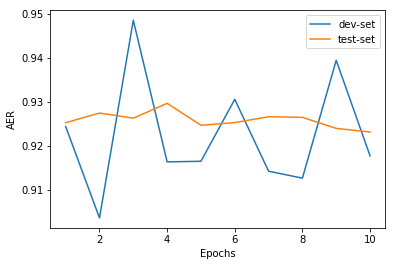

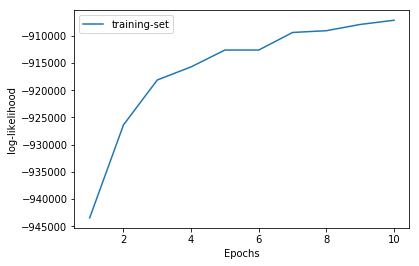

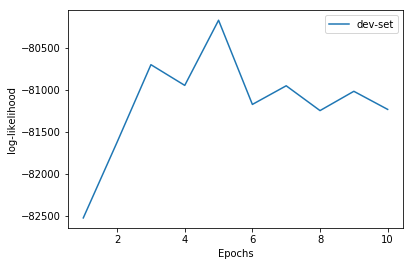

In [6]:
# plotting
import matplotlib.pyplot as plt

handles = []
ax1 = plt.plot(range(1, len(dev_AERs)+1), dev_AERs, label='dev-set')
handles.extend(ax1)
ax2 = plt.plot(range(1, len(test_AERs)+1), test_AERs, label='test-set')
handles.extend(ax2)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('AER')
plt.show()
plt.clf()

handles = []
ax1 = plt.plot(range(1, len(train_likelihoods)+1), train_likelihoods, label='training-set')
handles.extend(ax1)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('log-likelihood')
plt.show()
plt.clf()

handles = []
ax1 = plt.plot(range(1, len(dev_likelihoods)+1), dev_likelihoods, label='dev-set')
handles.extend(ax1)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('log-likelihood')
plt.show()
plt.clf()